In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

In [2]:
def plot_digits(X, y):
    X = (X - np.min(X, 0)) / (np.max(X, 0) - np.min(X, 0))

    plt.figure(figsize=(12, 9))

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.Set1(0.1*y[i]), fontdict={'weight':'bold', 'size':8})

    plt.xticks([])
    plt.yticks([])
    plt.show()

In [3]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
N, d = X.shape

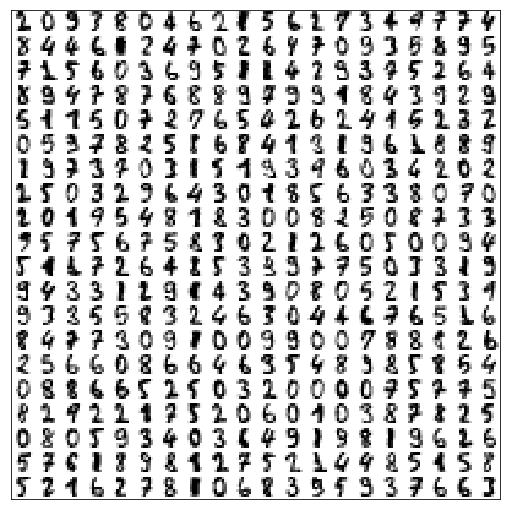

In [4]:
M = 20
image = np.zeros((10 * M, 10 * M))
order = np.random.permutation(N)
for i in range(M):
    for j in range(M):
        image[10*i+1:10*i+9, 10*j+1:10*j+9] = X[order[i*M+j], :].reshape((8, 8))

plt.figure(figsize=(9, 9))
plt.imshow(image, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

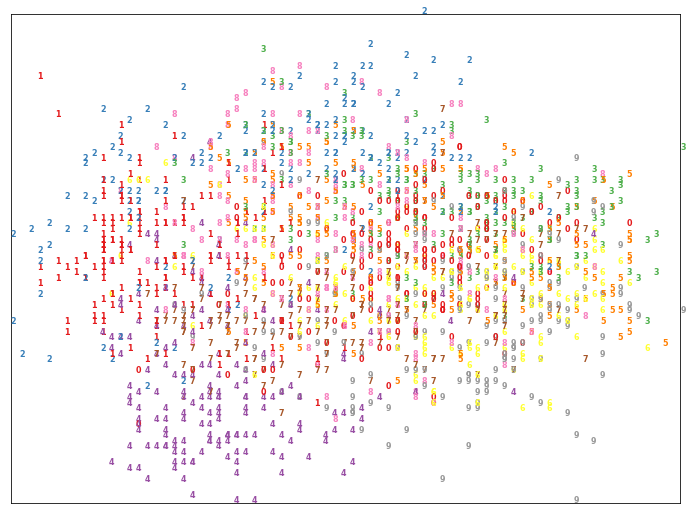

In [5]:
X_projected = random_projection.SparseRandomProjection(n_components=2).fit_transform(X)
plot_digits(X_projected, digits.target)

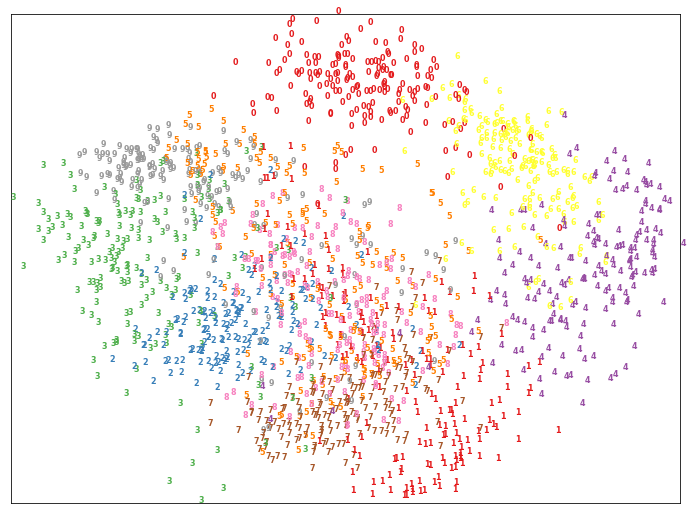

In [6]:
X_pca = decomposition.PCA(n_components=2).fit_transform(X)
plot_digits(X_pca, digits.target)

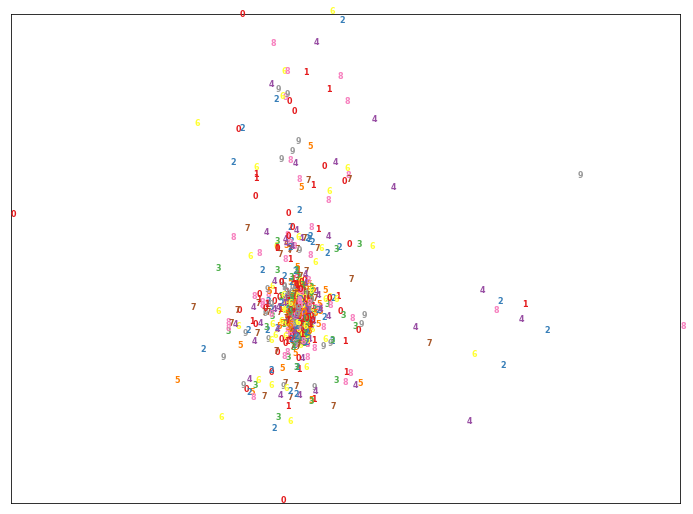

In [7]:
X_kpca = decomposition.KernelPCA(n_components=2, kernel="rbf", gamma=10).fit_transform(X)
plot_digits(X_kpca, digits.target)

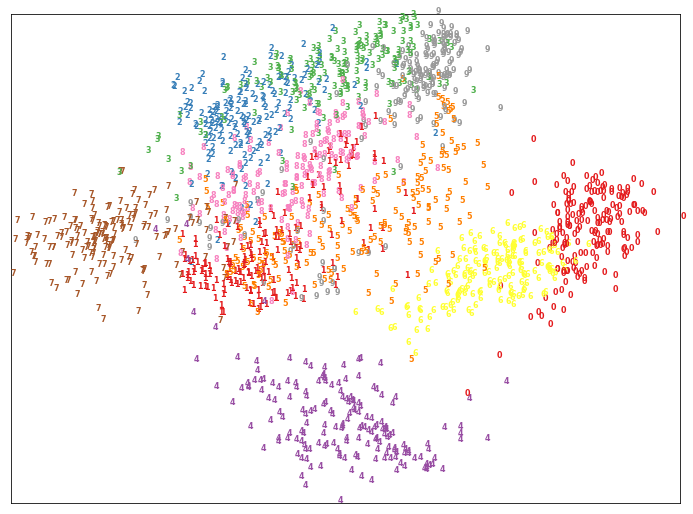

In [8]:
X_iso = manifold.Isomap(30, n_components=2).fit_transform(X)
plot_digits(X_iso, digits.target)

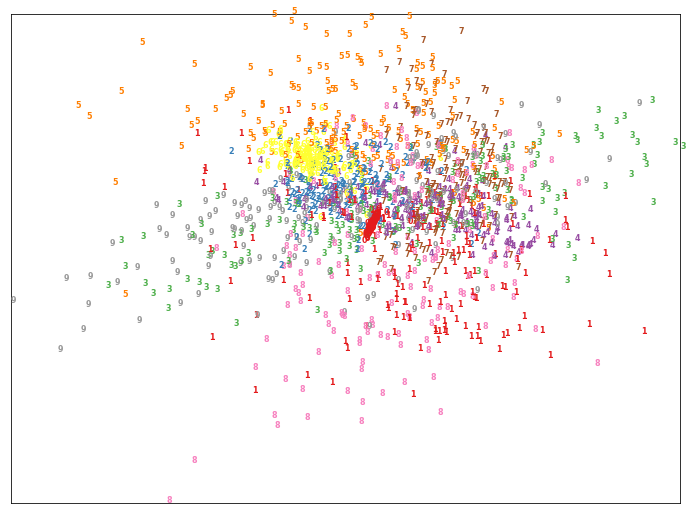

In [9]:
X_lle = manifold.LocallyLinearEmbedding(30, n_components=2).fit_transform(X)
plot_digits(X_lle, digits.target)

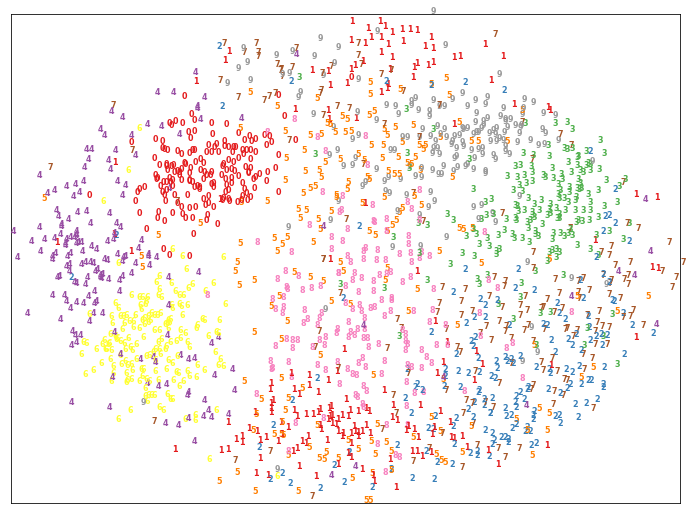

In [10]:
X_mds = manifold.MDS(n_components=2, n_init=1, max_iter=100).fit_transform(X)
plot_digits(X_mds, digits.target)

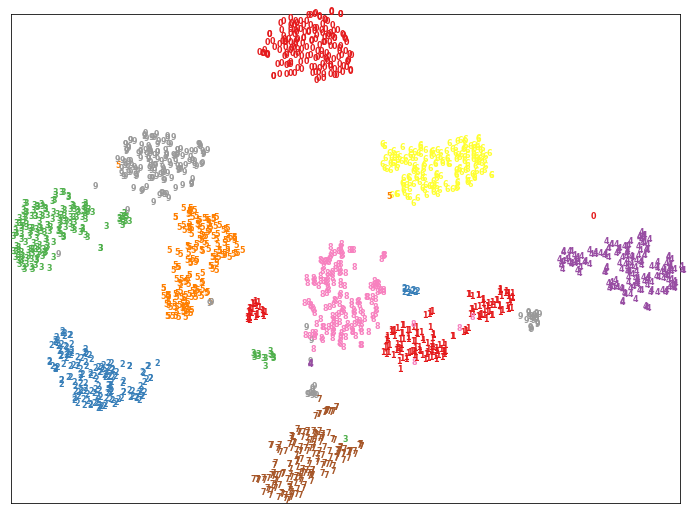

In [11]:
X_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(X)
plot_digits(X_tsne, digits.target)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
def crossValidation(data,dataClass,k):
    size = data.shape[0]
    arr = np.arange(size)
    np.random.shuffle(arr)
    err = 0
    n = int(size/10)
    for i in range(10):
        mask2 = arr[np.arange(i*n,min((i+1)*n,size))]
        mask1 = arr[np.concatenate((np.arange(i*n),np.arange((i+1)*n,size)))]
        er = KNN(data[mask1],data[mask2],dataClass[mask1],dataClass[mask2],k)
        #print er
        err += er[0]
    return float(err)/(size) * 100

In [14]:
def everything(X,Xclass,name):
    x1,x2 = zip(*np.random.permutation(zip(X,Xclass)))
    X1, X1class = np.asarray(x1),np.asarray(x2)
    print "Dla metody", name
    for i in range(1,5):
        print "Dla",i, crossValidation(X1,X1class,i),"%"

In [15]:
everything(X,y, "nieprzerobionych danych")

Dla metody nieprzerobionych danych
Dla 1 1.22426265999 %
Dla 2 1.39120756817 %
Dla 3 1.39120756817 %
Dla 4 1.4468558709 %


In [17]:
for i in range(1, 4):
    #everything(X,y, "nieprzerobionych danych")
    print "Odpalamy metody dla n_components=",i
    X_projected = random_projection.SparseRandomProjection(n_components=i).fit_transform(X)
    X_pca = decomposition.PCA(n_components=i).fit_transform(X)
    X_kpca = decomposition.KernelPCA(n_components=i, kernel="rbf", gamma=10).fit_transform(X)
    X_iso = manifold.Isomap(30, n_components=i).fit_transform(X)
    X_lle = manifold.LocallyLinearEmbedding(30, n_components=i).fit_transform(X)
    X_mds = manifold.MDS(n_components=i, n_init=1, max_iter=100).fit_transform(X)
    X_tsne = manifold.TSNE(n_components=i, init='pca').fit_transform(X)
    everything(X_projected,y, "Sparse Random Projection")
    everything(X_iso,y,"Isomap")
    everything(X_kpca,y, "KernelPCA")
    everything(X_lle,y, "Locally Linear Embedding")
    everything(X_mds,y, "manifold MDE")
    everything(X_pca,y, "PCA")
    everything(X_tsne,y, "TSNE")
    

Odpalamy metody dla n_components= 1
Dla metody Sparse Random Projection
Dla 1 83.4724540902 %
Dla 2 82.5264329438 %
Dla 3 81.5247634947 %
Dla 4 83.3611574847 %
Dla metody Isomap
Dla 1 61.3244296049 %
Dla 2 60.6566499722 %
Dla 3 60.0445186422 %
Dla 4 59.0984974958 %
Dla metody KernelPCA
Dla 1 89.3155258765 %
Dla 2 89.7050639955 %
Dla 3 89.0929326656 %
Dla 4 89.204229271 %
Dla metody Locally Linear Embedding
Dla 1 77.1285475793 %
Dla 2 75.8486366166 %
Dla 3 73.4001112966 %
Dla 4 73.8452977184 %
Dla metody manifold MDE
Dla 1 53.366722315 %
Dla 2 56.204785754 %
Dla 3 54.6466332777 %
Dla 4 53.1997774068 %
Dla metody PCA
Dla 1 70.7846410684 %
Dla 2 71.285475793 %
Dla 3 70.061213133 %
Dla 4 68.3361157485 %
Dla metody TSNE
Dla 1 2.22593210907 %
Dla 2 1.89204229271 %
Dla 3 1.61380077908 %
Dla 4 1.6694490818 %
Odpalamy metody dla n_components= 2
Dla metody Sparse Random Projection
Dla 1 76.9059543684 %
Dla 2 74.5687256539 %
Dla 3 74.958263773 %
Dla 4 72.8992765721 %
Dla metody Isomap
Dla 1 30.38